# Fake News Detection

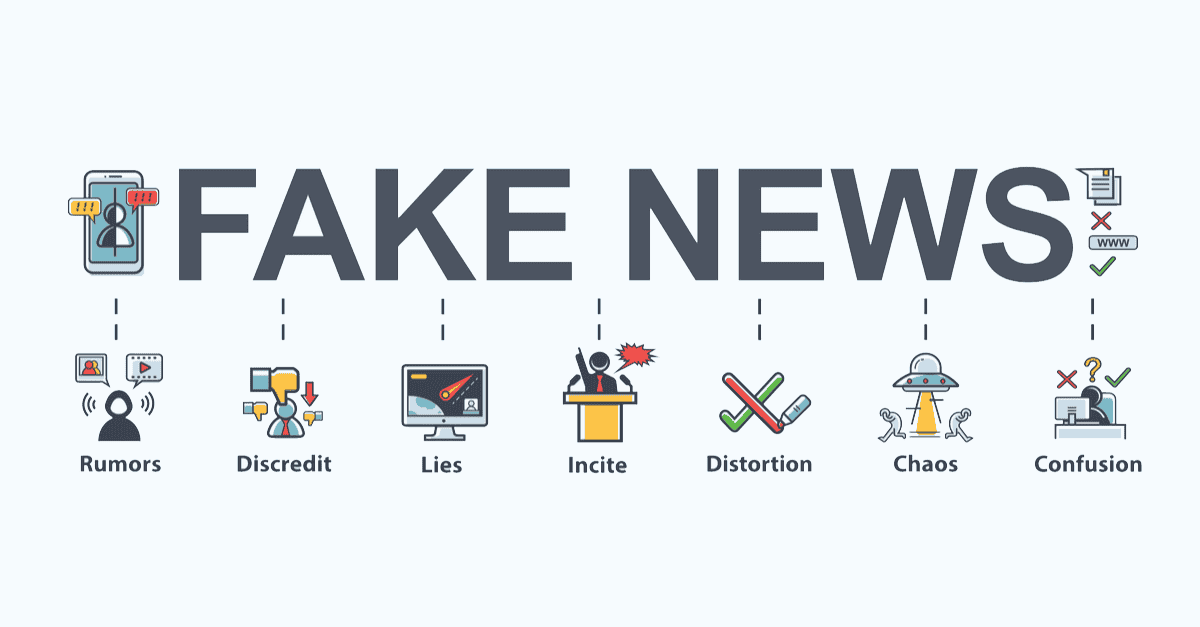

**About this project:**
In this project we have got True and Fake news, so let's figure out how much fake news in this dataset and true news in this dataset.

In [1]:
# import data analysis libraries
import pandas as pd
import numpy as np

# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# warnings
import warnings
warnings.filterwarnings ('ignore')

# Regular Expression
import re
import string

In [2]:
# importing datasets
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.shape, df_fake.shape

((21417, 4), (23481, 4))

* Total 4 columns in this dataset.

In [6]:
df_true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
df_fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

* We've got null values in fake dataset. Fill those null values with 0.

In [8]:
df_fake.fillna(0, inplace=True)

In [9]:
df_fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Data Modeling

**Let's create a new column called 'Class' to identify the true and fake news, while in case of merging the two datasets into one dataset.**

In [10]:
df_true["Class"] = 1
df_fake["Class"] = 0

In [11]:
df_true.shape,df_fake.shape

((21417, 5), (23481, 5))

* We can see in the above there are 5 columns now.
___

**Remove last 10 rows for manual testing and move to the new dataset.**

In [12]:
true_manual_testing = df_true.tail(10).copy()
true_manual_testing

,title,text,subject,date,Class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
df_true.drop(df_true.tail(10).index, inplace=True)

In [14]:
df_true.shape

(21407, 5)

In [15]:
fake_manual_testing = df_fake.tail(10).copy()
fake_manual_testing

,title,text,subject,date,Class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [16]:
df_fake.drop(df_fake.tail(10).index, inplace=True)

In [17]:
df_fake.shape

(23471, 5)

In [18]:
df_manual_testing = pd.concat([true_manual_testing,fake_manual_testing], axis=0)
df_manual_testing.to_csv('manual_testing.csv')

___
### Merge Fake and True datasets.

In [19]:
df_merge = pd.concat([df_true,df_fake], axis=0)
df_merge.shape

(44878, 5)

In [20]:
df = df_merge.drop(['title','subject','date'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44878 entries, 0 to 23470
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44878 non-null  object
 1   Class   44878 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


**Shuffle dataset to reduce the complexity to machine learning**

In [21]:
df = df.sample(frac = 1)
df.head()

,text,Class
13646,LONDON (Reuters) - Britain is seeking to build...,1
6452,Donald Trump has left a slime trail across mul...,0
9324,NEW YORK (Reuters) - A showdown between New Yo...,1
15761,Who knew that in our First Black President s ...,0
7620,When thinking about who you d likely want as t...,0


In [22]:
df.reset_index(inplace = True)

In [23]:
df.drop(["index"], axis = 1, inplace = True)

In [24]:
df.columns

Index(['text', 'Class'], dtype='object')

In [25]:
df.head()

,text,Class
0,LONDON (Reuters) - Britain is seeking to build...,1
1,Donald Trump has left a slime trail across mul...,0
2,NEW YORK (Reuters) - A showdown between New Yo...,1
3,Who knew that in our First Black President s ...,0
4,When thinking about who you d likely want as t...,0


## Process the texts

In [26]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [27]:
df["text"] = df["text"].apply(wordopt)

## Splitting the dataset

In [28]:
x = df["text"]
y = df["Class"]

## Training the model

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Convert text to vectors

In [30]:
vectorization = TfidfVectorizer()
x_v_train = vectorization.fit_transform(x_train)
x_v_test = vectorization.transform(x_test)

## Model Development

In [31]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_v_train, y_train)

LogisticRegression()

In [32]:
lr_pred = lr.predict(x_v_test)
lr_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [33]:
lr.score(x_v_test,y_test)

0.9862967914438503

In [34]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_v_train, y_train)

DecisionTreeClassifier()

In [35]:
dt_pred = lr.predict(x_v_test)
dt_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
dt.score(x_v_test, y_test)

0.9964349376114082

In [37]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_v_train, y_train)

GradientBoostingClassifier()

In [38]:
gb_pred = gb.predict(x_v_test)
gb_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [39]:
gb.score(x_v_test, y_test)

0.9969919786096256

In [40]:
# Random Forest classifier
rf = RandomForestClassifier()
rf.fit(x_v_train, y_train)

RandomForestClassifier()

In [41]:
rf_pred = rf.predict(x_v_test)
rf_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
rf.score(x_v_test, y_test)

0.9908645276292335

## Model Testing

In [43]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lr.predict(new_xv_test)
    pred_DT = dt.predict(new_xv_test)
    pred_GBC = gb.predict(new_xv_test)
    pred_RFC = rf.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [44]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of

In [242]:
news = str(input())
manual_testing(news)

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have d

In [240]:
news = str(input())
manual_testing(news)

MOSCOW (Reuters) - Vatican Secretary of State Cardinal Pietro Parolin said on Tuesday that there was  positive momentum  behind the idea of Pope Francis visiting Russia, but suggested there was more work to be done if it were to happen.  Parolin, speaking at a joint news conference in Moscow alongside Russian Foreign Minister Sergei Lavrov, did not give any date for such a possible visit. The Eastern and Western branches of Christianity split apart in 1054. The pope, leader of the world s 1.2 billion Catholics, is seeking to improve ties, and last year in Cuba held what was the first ever meeting between a Roman Catholic pope and a Russian Orthodox patriarch.  Parolin said he had also used his talks in the Russian capital to also raise certain difficulties faced by the Catholic Church in Russia. He said that Moscow and the Vatican disagreed about the plight of Christians in certain parts of the world. He did not elaborate. Parolin, who is due later on Tuesday to meet Patriarch Kirill, 

In [243]:
news = str(input())
manual_testing(news)

 By Dady Chery and Gilbert MercierAll writers with a desire to rattle people out of their torpor occasionally wonder if it is worthwhile to continue to try to raise their voices over the din of lies and distractions.More and more for us, such thoughts are occasioned, not by the mainstream, which predictably treats all the pronouncements from the powerful as being newsworthy, but by the fake left, which lobotomizes most of whom it touches. The increasing sophistication of this group and its rate of expansion are astounding. Its purpose is to annihilate and replace the real left, and it is making great strides in this regard.The real left includes those who, like Dr. Martin Luther King Jr. (MLK), came to realize that quantum leaps are the way to proceed, rather than tiny incremental change. The real left does not curry favor or approval from those in power; it challenges the social status quo and respects the inherent right of an injured and indignant population to rebel against authorit

In [241]:
news = str(input())
manual_testing(news)

JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threats

In [244]:
news = str(input())
manual_testing(news)

Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, a

## Thank You